In [1]:
import pandas
import numpy
from matplotlib import pyplot
import os
import ROOT

Welcome to JupyROOT 6.24/06


# Python timer

In [2]:
times = {"nodes":[],"meanruntime":[], "err":[], "throughput_MB_s":[]}
timedir = "20211115-8corespernode-taskset815-200x/appruntimes"
datasetsize = 157400503680
readpercent = 0.7949011466389114
readsize = 225881515200 # taken from the RNTuple metrics for 200 files

for f in os.listdir(timedir):
    array = numpy.genfromtxt(os.path.join(timedir, f), skip_header=2)
    nodes = f.split("_")[5].replace("nodes","")
    time_mean = numpy.mean(array)
    times["nodes"].append(int(nodes))
    times["meanruntime"].append(round(time_mean, 2))
    times["err"].append(round(numpy.std(array)/numpy.sqrt(len(array)), 2))
    times["throughput_MB_s"].append(round(readsize/time_mean/pow(10,6)))

timesdf_8 = pandas.DataFrame(times)
timesdf_8 = timesdf_8.sort_values(by="nodes").reset_index(drop=True).copy()
throughput_1node_8 = timesdf_8["throughput_MB_s"][0]
time_1node_8 = timesdf_8["meanruntime"][0]
timesdf_8["runtimespeedup"] = time_1node_8 / timesdf_8["meanruntime"]
timesdf_8["throughputspeedup"] = timesdf_8["throughput_MB_s"] / throughput_1node_8
timesdf_8

,nodes,meanruntime,err,throughput_MB_s,runtimespeedup,throughputspeedup
0,1,54.77,0.52,4124,1.000000,1.000000
1,2,27.85,0.29,8110,1.966607,1.966537
2,3,18.91,0.15,11945,2.896351,2.896460
3,4,14.75,0.14,15311,3.713220,3.712658
4,5,12.08,0.15,18692,4.533940,4.532493
5,6,10.14,0.12,22269,5.401381,5.399855


In [3]:
times = {"nodes":[],"meanruntime":[], "err":[], "throughput_MB_s":[]}
timedir = "20211115-16corespernode-taskset015-200x/appruntimes"
datasetsize = 157400503680
readpercent = 0.7949011466389114
readsize = 225881515200 # taken from the RNTuple metrics for 200 files

for f in os.listdir(timedir):
    array = numpy.genfromtxt(os.path.join(timedir, f), skip_header=2)
    nodes = f.split("_")[5].replace("nodes","")
    time_mean = numpy.mean(array)
    times["nodes"].append(int(nodes))
    times["meanruntime"].append(round(time_mean, 2))
    times["err"].append(round(numpy.std(array)/numpy.sqrt(len(array)), 2))
    times["throughput_MB_s"].append(round(readsize/time_mean/pow(10,6)))

timesdf_16 = pandas.DataFrame(times)
timesdf_16 = timesdf_16.sort_values(by="nodes").reset_index(drop=True).copy()
throughput_1node_16 = timesdf_16["throughput_MB_s"][0]
time_1node_16 = timesdf_16["meanruntime"][0]
timesdf_16["runtimespeedup"] = time_1node_16 / timesdf_16["meanruntime"]
timesdf_16["throughputspeedup"] = timesdf_16["throughput_MB_s"] / throughput_1node_16
timesdf_16

,nodes,meanruntime,err,throughput_MB_s,runtimespeedup,throughputspeedup
0,1,54.12,0.79,4174,1.000000,1.000000
1,2,30.47,0.45,7413,1.776173,1.775994
2,3,21.44,0.20,10536,2.524254,2.524197
3,4,16.36,0.26,13810,3.308068,3.308577
4,5,12.90,0.22,17506,4.195349,4.194058
5,6,11.68,0.42,19337,4.633562,4.632726


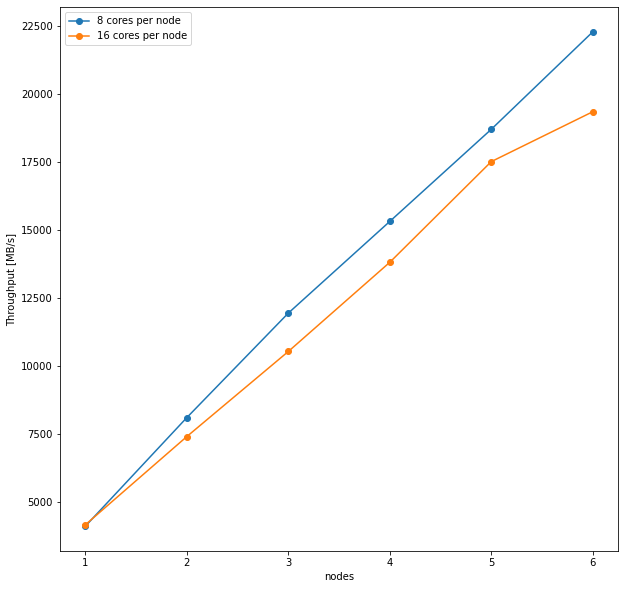

In [4]:
pyplot.figure(figsize=[10,10])
pyplot.plot(timesdf_8["nodes"], timesdf_8["throughput_MB_s"], label="8 cores per node", marker="o")
pyplot.plot(timesdf_16["nodes"], timesdf_16["throughput_MB_s"], label="16 cores per node", marker="o")
pyplot.xlabel("nodes")
pyplot.ylabel("Throughput [MB/s]")
pyplot.legend()

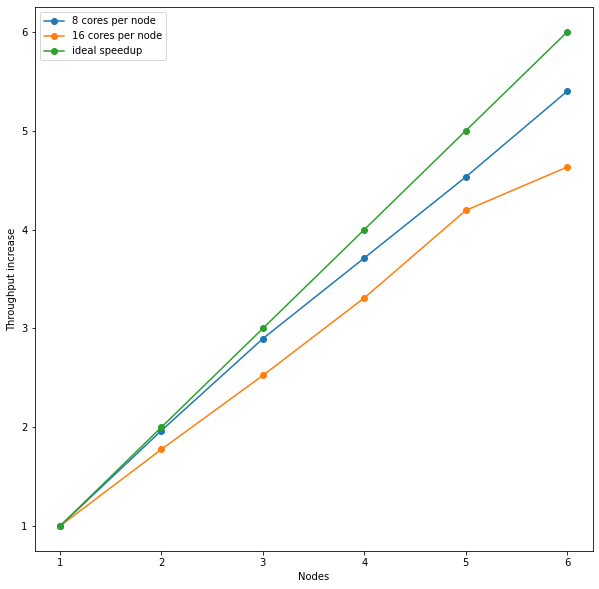

In [5]:
pyplot.figure(figsize=[10,10])
pyplot.plot(timesdf_8["nodes"], timesdf_8["throughputspeedup"], label="8 cores per node", marker="o")
pyplot.plot(timesdf_16["nodes"], timesdf_16["throughputspeedup"], label="16 cores per node", marker="o")
pyplot.plot(timesdf_8["nodes"], timesdf_8["nodes"], label="ideal speedup", marker="o")
pyplot.xticks(timesdf_8["nodes"])
pyplot.yticks(timesdf_8["nodes"])
pyplot.xlabel("Nodes")
pyplot.ylabel("Throughput increase")
pyplot.legend()